<html>
    <h1> K Means
        </h1>
        <p> <b> Min Khant Soe</b> </p>
        <p> ID: 122277 </p>
        <p> ^_^ </p>
    </html>

Modify the scratch code of K-means clustering in our lecture:
    
Modify so it print out the total within-cluster variation. Then try to run several k and identify which k is best.

Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.

Put everything into a class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from time import time


In [3]:
class KMeans:
    def __init__(self, k = 3, method = 'kmean',replacement=True, batch_size=100, max_iter=100):
        self.k = k
        self.method = method
        self.replacement=replacement
        self.batch_size = batch_size
        self.max_iter = max_iter
    
    def fit(self, X):
        m, n = X.shape

        #1. randomly choose k clusters from X
        
        rng = np.random.RandomState(55)
        i = rng.permutation(m)[:self.k]
        self.centers = X[i]
        
        #having max iter makes sure it will stop eventually
        for ix in np.arange(self.max_iter):
            
            if self.method == 'kmean':
                X_new = X
            elif self.method == 'mini_batch_kmean':
                mini_batch = rng.randint(m)
                X_new = X[mini_batch : mini_batch + self.batch_size]

            #2. assign labels based on closest center
            labels = pairwise_distances_argmin(X_new, self.centers)

            #3. find new centers
            new_centers = []
            for i in range(self.k):
                new_centers.append(X_new[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)
            
#             if (ix % 100 == 0):
#                 pred = pairwise_distances_argmin(X_new, new_centers)

#                 plt.figure(figsize=(5, 2))
#                 plt.title(f"for k: {self.k}")
#                 plt.scatter(X_new[:, 0], X_new[:, 1], c = pred)
#                 plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)
            
            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            #make sure to add rtol or atol since mini-batch does not converge
            if(np.allclose(self.centers, new_centers, rtol=0.2)):
                break
            else:
                self.centers = new_centers

        print(f"Done in {ix} iterations")

        #compute total within-variation score
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers) 
        
        for i in range(self.k):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()
            
        print("Total within variation score: ", total_with_variation_score)

    def predict(self, X):
        
        return pairwise_distances_argmin(X, self.centers)
    

In total within variation score code, X is used instead of X_new to get the total within variation score of the whole X. This will help us to check our result with the Elbow curve which can be obtained by KMeans from sklearn.cluster.

In [4]:
X, y_true = make_blobs(n_samples=1500, centers=4,cluster_std=0.60, random_state=0)
print(X.shape)

(1500, 2)


In [5]:
#mini batch kmean
for k in range(2, 7):
    print(f"=====k = {k}")
    start = time()
    model = KMeans(k = k, method = 'mini_batch_kmean')
    model.fit(X)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")

=====k = 2
Done in 4 iterations
Total within variation score:  5830.243528913617
Fit and predict time 0.0029900074005126953
=====k = 3
Done in 4 iterations
Total within variation score:  2493.8460360964195
Fit and predict time 0.0029935836791992188
=====k = 4
Done in 3 iterations
Total within variation score:  1006.539858127662
Fit and predict time 0.0029871463775634766
=====k = 5
Done in 3 iterations
Total within variation score:  915.4276668680077
Fit and predict time 0.002992868423461914
=====k = 6
Done in 3 iterations
Total within variation score:  837.708109987758
Fit and predict time 0.001993417739868164


In [6]:
#normal kmean
for k in range(2, 7):
    print(f"=====k = {k}")
    start = time()
    model = KMeans(k = k, method = 'kmean')
    model.fit(X)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")


=====k = 2
Done in 4 iterations
Total within variation score:  5807.863173525951
Fit and predict time 0.0029859542846679688
=====k = 3
Done in 5 iterations
Total within variation score:  2493.8460360964195
Fit and predict time 0.002995014190673828
=====k = 4
Done in 2 iterations
Total within variation score:  1007.1921816289595
Fit and predict time 0.0019922256469726562
=====k = 5
Done in 2 iterations
Total within variation score:  913.5432930633513
Fit and predict time 0.0019943714141845703
=====k = 6
Done in 2 iterations
Total within variation score:  837.0174255941797
Fit and predict time 0.001992464065551758



After running the model for both KMean and Mini Batch KMean, I found that the best k is "4".

For k = 4, 5 and 6 of "kmean" and "mini batch kmean", iterations were done in 2 and 3 respectively. Besides, Total within variation score for them are not in big range and run time are also almost same.

As professor mentioned smaller k with acceptable variation score is better, I choose k = 4 as the best k.

I confirmed my result with the Elbow curve which is below this cell.

Text(5, 2000, 'elbow')

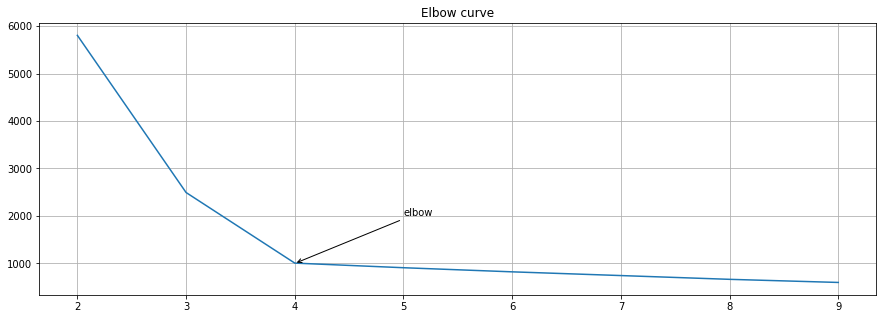

In [7]:
#sum of squared distances
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), ssd)
plt.xticks(range(2, 10))
plt.grid(True)
plt.title('Elbow curve')

plt.annotate('elbow', xy=(4, 1000), xytext=(5, 2000),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))